## Task 1: Importing Libraries

In [3]:
import keras
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from platform import python_version
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img

print('Python version:', python_version())
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
from distutils.dir_util import copy_tree

Python version: 3.6.9
Numpy version: 1.18.5
Seaborn version: 0.11.0


In [4]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras_preprocessing.image import ImageDataGenerator

## Task 2: Dataset Creation

In [5]:
#Loading my kaggle API Key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajansh87","key":"792ad04bb02c58836d2ee490d28bff93"}'}

In [6]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
# Get datasets from kaggle
!kaggle datasets download -d biancaferreira/african-wildlife
!kaggle datasets download -d kdnishanth/animal-classification
!kaggle datasets download -d viswatejag/animal-detection-small-dataset
!kaggle datasets download -d jerrinbright/cheetahtigerwolf

 98% 438M/448M [00:03<00:00, 93.3MB/s]
100% 448M/448M [00:03<00:00, 124MB/s] 
 98% 408M/414M [00:02<00:00, 228MB/s]
100% 414M/414M [00:02<00:00, 184MB/s]
100% 6.40G/6.40G [02:35<00:00, 56.1MB/s]
100% 6.40G/6.40G [02:35<00:00, 44.1MB/s]
100% 2.50G/2.51G [01:03<00:00, 38.2MB/s]
100% 2.51G/2.51G [01:03<00:00, 42.4MB/s]


In [8]:
os.mkdir("/content/train_data")
os.mkdir("/content/train_data/data")
os.mkdir("/content/tem/")
!rm -rf /content/sample_data/*
!rmdir /content/sample_data

rmdir: failed to remove '/content/sample_data': No such file or directory


In [9]:
#unzip datasets to local directory
!unzip -q "/content/african-wildlife.zip" -d "/content/temp/"
!unzip -q "/content/animal-classification.zip" -d "/content/temp/"
!unzip -q "/content/animal-detection-small-dataset.zip" -d "/content/temp/"
!unzip -q "/content/cheetahtigerwolf.zip" -d "/content/temp/"
#now after this delete them from disk manually
!rm -rf /content/african-wildlife.zip
!rm -rf /content/animal-classification.zip
!rm -rf /content/animal-detection-small-dataset.zip
!rm -rf /content/cheetahtigerwolf.zip
!rm -rf /content/kaggle.json

In [10]:
!rm -rf /content/temp/test/test/*
!rmdir /content/temp/test/test/
!rmdir /content/temp/test/
!mv /content/temp/train/train/* /content/temp/

mv: cannot move '/content/temp/train/train/buffalo' to '/content/temp/buffalo': Directory not empty
mv: cannot move '/content/temp/train/train/horse' to '/content/temp/horse': Directory not empty


In [11]:
!rm -rf /content/temp/train/train/
!rmdir /content/temp/train/train/
!rmdir /content/temp/train/
!rm -f /content/temp/data.py


rmdir: failed to remove '/content/temp/train/train/': No such file or directory


In [12]:
!mv /content/temp/ANIMAL-N30/ANIMALS/* /content/temp/
!mv /content/temp/ANIMALS/ANIMALS/* /content/temp/


mv: cannot move '/content/temp/ANIMALS/ANIMALS/CHEETAH' to '/content/temp/CHEETAH': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/CROCODILES' to '/content/temp/CROCODILES': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/ELEPHANT' to '/content/temp/ELEPHANT': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/GIRAFFE' to '/content/temp/GIRAFFE': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/LION' to '/content/temp/LION': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/PANDA' to '/content/temp/PANDA': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/RHINO' to '/content/temp/RHINO': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/TIGER' to '/content/temp/TIGER': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/WOLF' to '/content/temp/WOLF': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/ZEBRA' to '/content/temp/ZEBRA': 

In [13]:
!rm -rf /content/temp/ANIMAL-N30/ANIMALS/*
!rm -rf /content/temp/ANIMALS/ANIMALS/*

In [14]:
!rmdir /content/temp/ANIMAL-N30/ANIMALS
!rmdir /content/temp/ANIMALS/ANIMALS

In [15]:
!rmdir /content/temp/ANIMALS
!rmdir /content/temp/ANIMAL-N30
!mv /content/temp /content/tem/

In [16]:
#convert names of all sub-directories in our data to lowercase
import os
path='/content/tem/temp/'
for file in os.listdir(path):
    if file!=file.lower():
        os.rename(path+file,file.lower())
#after this all the directories whose names were in uppercase gets converted to lowercase and comes outside /temp/ directory.

In [17]:
#copying all the directories from data which were already in lowercase and didn't came outside the /temp/ directory 
fromDirectory="/content/tem/temp/"
toDirectory="/content/tem/"
copy_tree(fromDirectory,toDirectory)
#now all data is been converted to lowercase and are at /tem/


['/content/tem/cow/cow/cow.133.jpeg',
 '/content/tem/cow/cow/cow.658.jpeg',
 '/content/tem/cow/cow/cow.186.jpeg',
 '/content/tem/cow/cow/cow.1681.jpeg',
 '/content/tem/cow/cow/cow.1188.jpeg',
 '/content/tem/cow/cow/cow.1714.jpeg',
 '/content/tem/cow/cow/cow.32.jpeg',
 '/content/tem/cow/cow/cow.1519.jpeg',
 '/content/tem/cow/cow/cow.1206.jpeg',
 '/content/tem/cow/cow/cow.14.jpeg',
 '/content/tem/cow/cow/cow.1506.jpeg',
 '/content/tem/cow/cow/cow.1513.jpeg',
 '/content/tem/cow/cow/cow.106.jpeg',
 '/content/tem/cow/cow/cow.613.jpeg',
 '/content/tem/cow/cow/cow.1722.jpeg',
 '/content/tem/cow/cow/cow.148.jpeg',
 '/content/tem/cow/cow/cow.426.jpeg',
 '/content/tem/cow/cow/cow.55.jpeg',
 '/content/tem/cow/cow/cow.946.jpeg',
 '/content/tem/cow/cow/cow.1484.jpeg',
 '/content/tem/cow/cow/cow.1347.jpeg',
 '/content/tem/cow/cow/cow.1289.jpeg',
 '/content/tem/cow/cow/cow.72.jpeg',
 '/content/tem/cow/cow/cow.395.jpeg',
 '/content/tem/cow/cow/cow.1772.jpeg',
 '/content/tem/cow/cow/cow.640.jpeg',
 '/c

In [18]:
#delete all files inside /temp/
!rm -rf /content/tem/temp/
!rmdir /content/tem/temp
for file in os.listdir('/content/'):
  if file!="tem":
    loc="/content/"+file
    !mv $file /content/tem/

rmdir: failed to remove '/content/tem/temp': No such file or directory
mv: cannot move 'cow' to '/content/tem/cow': Directory not empty
mv: cannot move 'walrus' to '/content/tem/walrus': Directory not empty
mv: cannot move 'moose' to '/content/tem/moose': Directory not empty
mv: cannot move 'wolf' to '/content/tem/wolf': Directory not empty
mv: cannot move 'horse' to '/content/tem/horse': Directory not empty
mv: cannot move 'elephant' to '/content/tem/elephant': Directory not empty
mv: cannot move 'zebra' to '/content/tem/zebra': Directory not empty
mv: cannot move 'rhino' to '/content/tem/rhino': Directory not empty
mv: cannot move 'hippopotamus' to '/content/tem/hippopotamus': Directory not empty
mv: cannot move 'goat' to '/content/tem/goat': Directory not empty


In [19]:
#remove unneccessary files
for file in os.listdir('/content/'):
  if file!="tem":
    loc="/content/"+file
    !rm -rf $file

In [20]:
!mv tem data

In [21]:
# Worked over all the redundancy from data.
!cd data
!mv /content/data/bobcat/* /content/data/cat/;mv /content/data/cats/* /content/data/cat/;mv /content/data/persian+cat/* /content/data/cat/;
!mv /content/data/siamese+cat/* /content/data/cat/;rm -rf /content/data/bobcat/;rm -rf /content/data/cats;rm -rf /content/data/siamese+cat/;
!rm -rf /content/data/persian+cat/;mv /content/data/dogs/* /content/data/dog;rmdir /content/data/dogs;mv /content/data/spider+monkey/* /content/data/monkey;
!rmdir /content/data/spider+monkey;mv /content/data/german+shepherd/* /content/data/dog/;rmdir /content/data/german+shepherd;mv /content/data/grizzly+bear/* /content/data/bear/;
!rmdir /content/data/grizzly+bear;mv /content/data/rhino/* /content/data/rhinoceros/;rmdir /content/data/rhino;rm -rf /content/data/hen;
!rm -rf /content/data/butterfly;rm -rf /content/data/spyder;rm -rf /content/data/meta-data/meta-data/; rmdir /content/data/meta-data/meta-data;rmdir /content/data/meta-data;
!cd ..  

rmdir: failed to remove '/content/data/meta-data/meta-data': No such file or directory


In [22]:
#create test data set
os.mkdir("test_data")

In [23]:
# make dirctories inside test_data with same name as of data
data_path='/content/data/'
test_path='/content/test_data/'
for name in os.listdir(data_path):
    os.mkdir(test_path+name)

In [24]:
mv data train_data

In [25]:
!rm -rf /content/train_data/train_data/data/*
!rmdir /content/train_data/train_data/data
!rmdir /content/train_data/train_data

!rm -rf /content/test_data/train_data/data/*
!rmdir /content/test_data/train_data/data
!rmdir /content/test_data/train_data

!rm -rf /content/train_data/cat/dog/
!rmdir /content/train_data/cat/dog
!rm -rf /content/train_data/dog/dog/
!rmdir /content/train_data/dog/dog

!mv /content/train_data/cow/cow/* /content/train_data/cow/
!mv /content/train_data/elephant/elephant/* /content/train_data/elephant/
!mv /content/train_data/goat/goat/* /content/train_data/goat/
!mv /content/train_data/horse/horse/* /content/train_data/horse/

!rmdir /content/train_data/cow/cow
!rmdir /content/train_data/elephant/elephant
!rmdir /content/train_data/goat/goat
!rmdir /content/train_data/horse/horse

!rm -rf /content/train_data/.config/
!rmdir /content/train_data/.config/

rmdir: failed to remove '/content/test_data/train_data/data': No such file or directory
rmdir: failed to remove '/content/train_data/cat/dog': No such file or directory
rmdir: failed to remove '/content/train_data/dog/dog': No such file or directory
rmdir: failed to remove '/content/train_data/.config/': No such file or directory


In [42]:
# create test_data by taking 25% images from data

total_train_images,total_test_images,total_train_classes,total_test_classes=0,0,0,0
path="/content/train_data/"
for file in os.listdir(path):
    if "notebook" not in file:
        total_train_classes+=1
        total_images=len(os.listdir(path+file+"/"))
        test_image_count=(25/100)*total_images #25% for test and 75% for train
        for i in range(math.ceil(test_image_count)):
            img=random.choice(os.listdir(path+file+'/'))
            shutil.move(path+file+'/'+img,'/content/test_data/'+file+'/')
            #print(img)
        print(file,total_images,math.ceil(test_image_count))
        total_train_images+=(total_images-math.ceil(test_image_count))
        #print(file,math.ceil(test_image_count))
print("total train images are : ",total_train_images," and total train classes are : ",total_train_classes)

cow 1399 350
walrus 111 28
collie 510 128
kangaroo 624 156
dog 1247 312
cat 1602 401
panda 634 159
meerkat 643 161
squirel 625 157
moose 357 90
antelope 521 131
bat 192 48
killer+whale 144 36
bear 1125 282
raccoon 259 65
deer 690 173
ostrich 607 152
wolf 302 76
crocodiles 600 150
rat 165 42
tiger 540 135
mouse 93 24
seal 498 125
monkey 775 194
rabbit 627 157
lion 604 151
rhinoceros 921 231
squirrel 606 152
penguins 610 153
horse 1967 492
elephant 1648 412
weasel 138 35
cheetah 621 156
porcupine 610 153
zebra 564 141
beaver 99 25
hippopotamus 348 87
otter 389 98
chimpanzee 357 90
goat 1365 342
dalmatian 269 68
chihuahua 289 73
mole 45 12
ox 375 94
snake 655 164
giraffe 649 163
tortoise 614 154
buffalo 564 141
total train images are :  21878  and total train classes are :  48


## Task 3: Image Augmentation

In [111]:
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/content/train_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        '/content/test_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')

Found 21016 images belonging to 48 classes.
Found 16429 images belonging to 48 classes.


In [112]:
training_set.class_indices # to see classes of our dataset

{'antelope': 0,
 'bat': 1,
 'bear': 2,
 'beaver': 3,
 'buffalo': 4,
 'cat': 5,
 'cheetah': 6,
 'chihuahua': 7,
 'chimpanzee': 8,
 'collie': 9,
 'cow': 10,
 'crocodiles': 11,
 'dalmatian': 12,
 'deer': 13,
 'dog': 14,
 'elephant': 15,
 'giraffe': 16,
 'goat': 17,
 'hippopotamus': 18,
 'horse': 19,
 'kangaroo': 20,
 'killer+whale': 21,
 'lion': 22,
 'meerkat': 23,
 'mole': 24,
 'monkey': 25,
 'moose': 26,
 'mouse': 27,
 'ostrich': 28,
 'otter': 29,
 'ox': 30,
 'panda': 31,
 'penguins': 32,
 'porcupine': 33,
 'rabbit': 34,
 'raccoon': 35,
 'rat': 36,
 'rhinoceros': 37,
 'seal': 38,
 'snake': 39,
 'squirel': 40,
 'squirrel': 41,
 'tiger': 42,
 'tortoise': 43,
 'walrus': 44,
 'weasel': 45,
 'wolf': 46,
 'zebra': 47}

## Task 3: Model Creation

In [114]:
#creating an instance of Sequence which is as model
model = Sequential()

In [115]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same', 
                        activation='relu',
                   input_shape=(32, 32, 1)))

In [116]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [117]:
#adding one more convolution layer for better model
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same', 
                        activation='relu'
                      ))

In [118]:
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))

In [119]:
#dropout regularlization
model.add(Dropout(0.5))

In [120]:
#layer in which we are converting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [121]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=80, activation='relu'))

In [122]:
#dropout regularlization
model.add(Dropout(0.5))

In [123]:
# output layer : Since we have to do multi-class classification so we'll apply softmax activation function 
# we have 48 classes of animals so output layer would have that many neurons.
model.add(Dense(units=48, activation='softmax'))

In [124]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 80)               

## Task 5: Model Training

In [ ]:
history = model.fit(
        training_set,
        steps_per_epoch=(21016/64),
        epochs=400,
        verbose=1,
        validation_data=test_set,
        validation_steps=(16429/64))
#Total images in train_data = 21016   
#Total images in test_data = 16429    
#epoch=400

Epoch 1/400
142/328 [===========>..................] - ETA: 1:40 - loss: 3.7109 - accuracy: 0.0650

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


329/328 [==============================] - 315s 959ms/step - loss: 3.6543 - accuracy: 0.0755 - val_loss: 3.5117 - val_accuracy: 0.1197
Epoch 2/400
329/328 [==============================] - 306s 930ms/step - loss: 3.4950 - accuracy: 0.1096 - val_loss: 3.3678 - val_accuracy: 0.1335
Epoch 3/400
329/328 [==============================] - 304s 925ms/step - loss: 3.3996 - accuracy: 0.1258 - val_loss: 3.2896 - val_accuracy: 0.1474
Epoch 4/400
329/328 [==============================] - 307s 932ms/step - loss: 3.3327 - accuracy: 0.1377 - val_loss: 3.2812 - val_accuracy: 0.1461
Epoch 5/400
329/328 [==============================] - 307s 932ms/step - loss: 3.2943 - accuracy: 0.1484 - val_loss: 3.1839 - val_accuracy: 0.1729
Epoch 6/400
329/328 [==============================] - 307s 932ms/step - loss: 3.2603 - accuracy: 0.1492 - val_loss: 3.1634 - val_accuracy: 0.1646
Epoch 7/400
329/328 [==============================] - 305s 928ms/step - loss: 3.2306 - accuracy: 0.1538 - val_loss: 3.1179 - val_

## Task 6: Accuracy

In [ ]:
finalAccuracy = history.history["accuracy"]
finalAccuracy

In [ ]:
val_accuracy = history.history['val_accuracy']
val_accuracy

In [ ]:
finalloss = history.history["loss"]
finalloss

In [ ]:
finalval_loss = history.history["val_loss"]
finalval_loss

In [ ]:
#Graphing our training and validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
model.save("iwildcam_model.h5")#save model

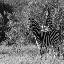

In [ ]:
from keras.preprocessing import image
test_image = image.load_img("/content/train_data/zebra/zebra102.jpg",target_size=(64,64),color_mode='grayscale')
test_image 


In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)


In [ ]:
test_image.shape

(1, 64, 64, 1)

In [ ]:
result = model.predict(test_image)

my_dict=training_set.class_indices
def get_key(val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

pred=list(result[0])
for i in range(len(pred)):
    if pred[i]!=0:
        print(get_key(i))

tortoise
